# Arnold's Cat Map

## 0. Initialize

In [1]:
#for image
using Images
using ImageView
using Colors

#visualize
using Plots
pyplot()

Plots.PyPlotBackend()

In [2]:
#reverse image vertically
function reverse_y(img)
    N = size(img, 1)
    rev_img = similar(img)
    for n in 1:N
        rev_img[N-n+1, :] = img[n,:]
    end
    return rev_img
end

#load an image file
function gray_img(filename)
    img_file = load(filename)
    gray_file = Colors.Gray.(img_file)
    img = convert(Array{Float64}, gray_file)
    return reverse_y(img)
end

#arnold's cat map
function cat(x, y)
    return 2*x+y, x+y
end

function cat(x, y, N)
    x_new, y_new = cat(x, y)
    return 1 + x_new % N, 1 + y_new % N
end

#map a cat map just once
function make_cat_img(img, N)
    new_img = zeros(N, N)
    for x in 1:N
        for y in 1:N
            new_x, new_y = cat(x, y, N)
            new_img[new_y, new_x] = img[y, x]
        end
    end
    return new_img
end

function get_origin_img(filename)
    img = gray_img(filename)
    N = size(img, 1)
    hm = heatmap(img, c=:grays, aspect_ratio=1, colorbar=:none, ticks=:none)
    return img, N, hm
end

function map_many_times(origin_img, N, n_iter)
    hms = [] #heatmap array
    img = copy(origin_img)
    
    #map just once
    hm = heatmap(img, c=:grays, aspect_ratio=1, colorbar=:none, ticks=:none, title="Original")
    push!(hms, hm)
    
    for i in 1:n_iter
        img =  make_cat_img(img, N)
        hm = heatmap(img, c=:grays, aspect_ratio=1, colorbar=:none, ticks=:none, title="iter=$(i)")
        push!(hms, hm)
    end
    return plot(hms..., layout=(div(n_iter+1, 4), 4), size=(600, 600))
end

#define error of images from the original one
function my_error(origin_mat, mat)
    sum(@. (origin_mat - mat)^2)
end

function find_period(N_max, tol)
    ps = []
    max_iter = 1000
    for N in 1:N_max
        arr = rand(N, N) #original image size N×N
        new_arr = copy(arr)
        for i in 1:max_iter
            new_arr = make_cat_img(new_arr, N)
            
            if my_error(arr, new_arr) < tol
                #i is a period!
                push!(ps, i)
                break
            end
        end
    end
    return ps
end

find_period (generic function with 1 method)

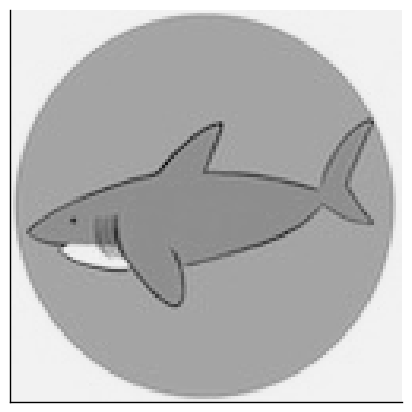

"/Users/kitanotomoya/Documents/julia/ML/ブログ/Arnold's-Cat-Map/fig1.png"

In [3]:
poor_shark, N, fig1 = get_origin_img("Arnold's-Cat-Map/my_shark.png")
savefig(fig1, "Arnold's-Cat-Map/fig1.png")

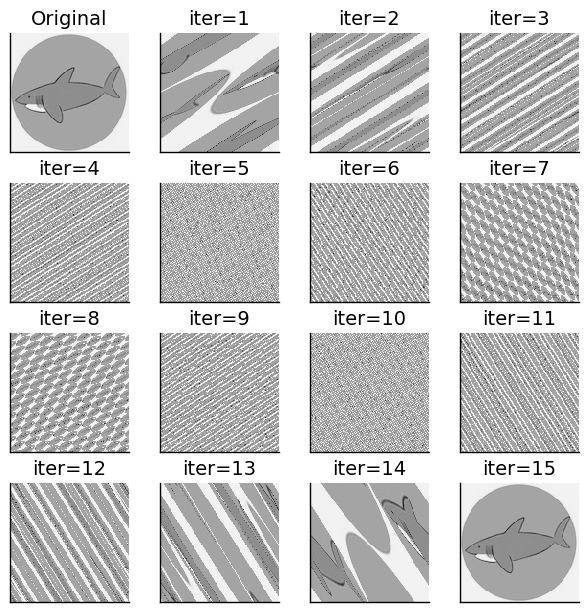

"/Users/kitanotomoya/Documents/julia/ML/ブログ/Arnold's-Cat-Map/fig2.png"

In [4]:
n_iter = 15
fig2 = map_many_times(poor_shark, N, n_iter)
savefig(fig2, "Arnold's-Cat-Map/fig2.png")

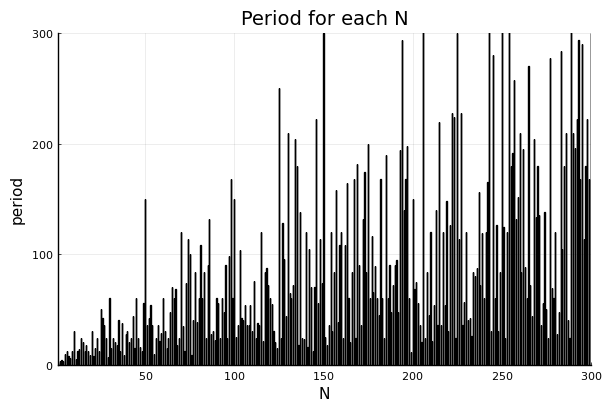

"/Users/kitanotomoya/Documents/julia/ML/ブログ/Arnold's-Cat-Map/fig3.png"

In [5]:
N_max = 300
tol = 1e-3
ps = find_period(N_max, tol)
fig3 = plot(ps, st=:bar, label=false, xlabel="N", ylabel="period", title="Period for each N", 
    bar_width=0.1, xlim=(1,300), ylim=(0,300))
savefig(fig3, "Arnold's-Cat-Map/fig3.png")